# More on SVD 

# (a)

$$\textbf{A} = \textbf{USV}^{T}$$
$$A_{np} = U_{nn}S_{np}V_{pp}^T$$
$$\textbf{A} = [\textbf{u}_1 \; \textbf{u}_2 \; \textbf{u}_3 \; ... \; \textbf{u}_{n}] 
\begin{bmatrix}
s_1 & 0 & ... & 0 & 0 & ... & 0\\
0 & s_2 & ... & 0 & 0 & ... & 0\\
\vdots & \vdots & ... & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & ... & s_{\alpha} & 0 & ... & 0\\
0 & 0 & ... & 0 & 0 & ... & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & ... & 0 & 0 & ... & 0\\
\end{bmatrix}
\begin{bmatrix}
\textbf{v}_1^T\\
\\
\textbf{v}_2^T\\
\\
\textbf{v}_3^T\\
\\
\vdots\\
\\
\textbf{v}_p^T\\
\end{bmatrix}
$$
$$ = [\textbf{u}_1 \; \textbf{u}_2 \; \textbf{u}_3 \; ... \; \textbf{u}_{n}] 
\begin{bmatrix}
s_1\textbf{v}_1^T\\
\\
s_2\textbf{v}_2^T\\
\\
s_3\textbf{v}_3^T\\
\\
\vdots\\
\\
s_{\alpha}\textbf{v}_{\alpha}^T\\
0\\
\vdots\\
0
\end{bmatrix}
$$
$$ = s_1\textbf{u}_1\textbf{v}_1^T + s_2\textbf{u}_2\textbf{v}_2^T + s_3\textbf{u}_3\textbf{v}_3^T + ... + s_{\alpha}\textbf{u}_{\alpha}\textbf{v}_{\alpha}^T$$
$$ \therefore \boxed{A = \sum_{\alpha} s_{\alpha}\textbf{u}_{\alpha}\textbf{v}_{\alpha}^T}$$


# (b)

Singular values are:  [4.18423899 1.07887757 0.84037704 0.72347288 0.60097835 0.22126987]


<Figure size 640x480 with 0 Axes>

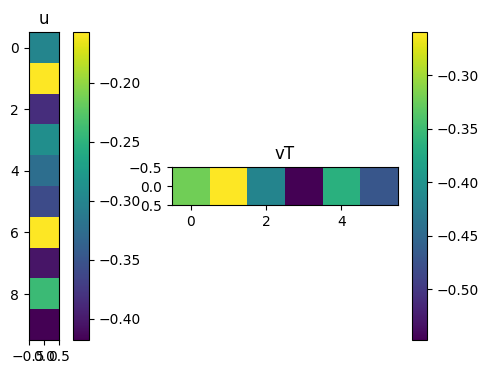

<Figure size 640x480 with 0 Axes>

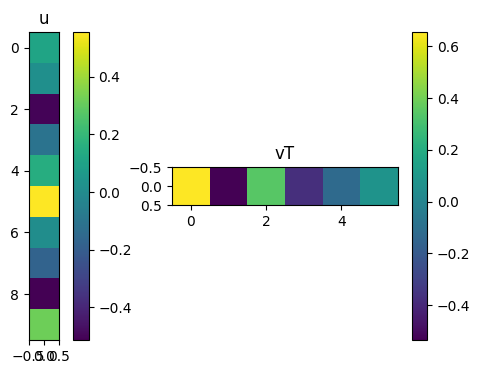

<Figure size 640x480 with 0 Axes>

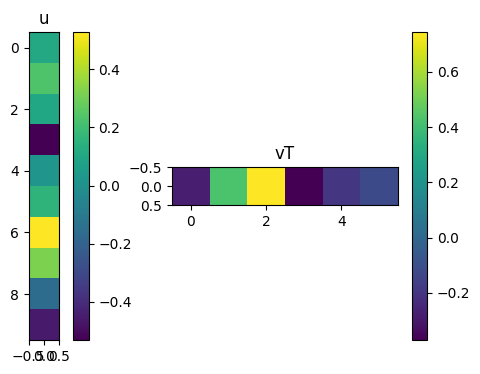

<Figure size 640x480 with 0 Axes>

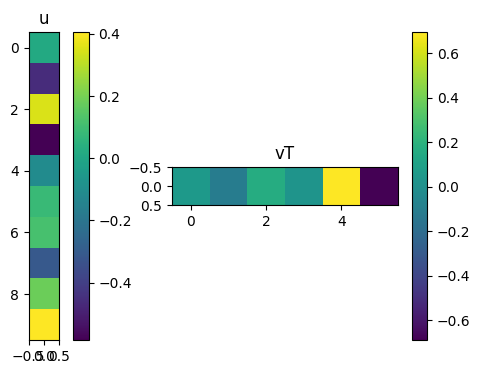

<Figure size 640x480 with 0 Axes>

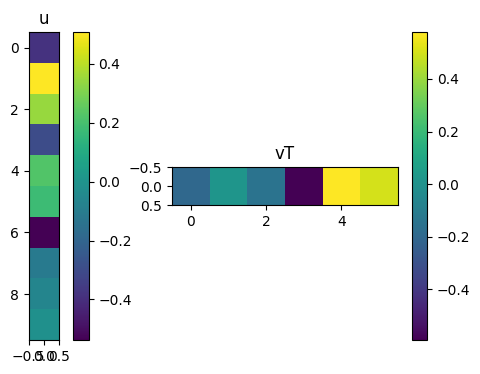

<Figure size 640x480 with 0 Axes>

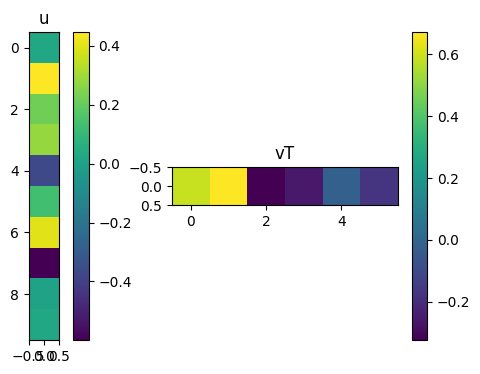

<Figure size 640x480 with 0 Axes>

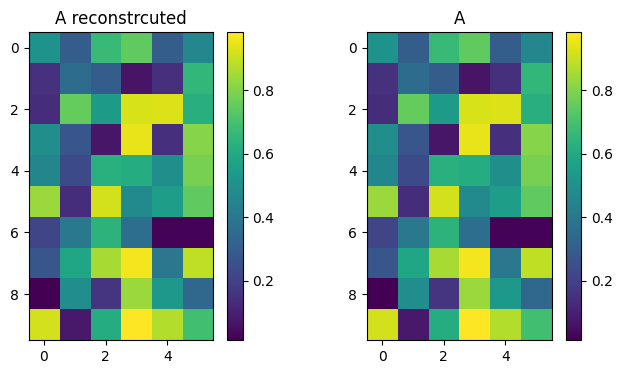

<Figure size 640x480 with 0 Axes>

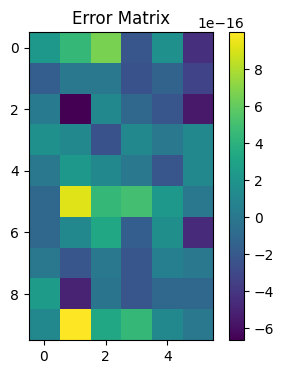

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

# Most code is from in class example for part a
def plot_matrices(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

A = np.random.rand(60).reshape(10,6)

U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
print("Singular values are: ", Sdiag)

A_reconstruct = np.zeros(A.shape)
for i in range(len(Sdiag)):
    # Plot component matrices
    u = U[:,i]
    u = np.expand_dims(u, axis=1)
    vT = VT[i, :]
    vT = np.expand_dims(vT, axis=0)
    plot_matrices([u, vT], titles=['u', 'vT'])
    A_reconstruct += Sdiag[i]*u@vT

plot_matrices([A_reconstruct, A], titles=['A reconstrcuted', 'A'])

# Check the reconstructed matrix
plot_matrices([A_reconstruct- A], titles=[r"Error Matrix"])

# (c)

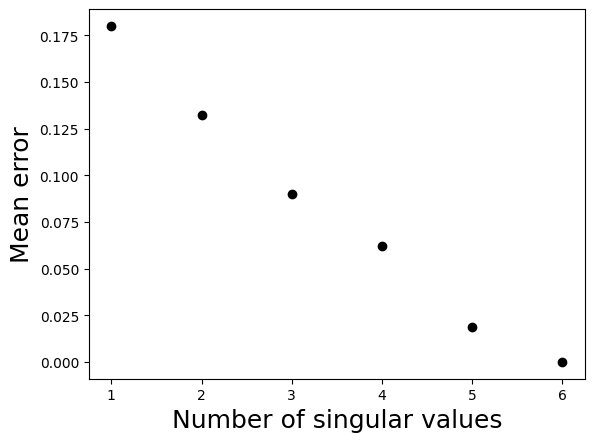

[1.79973658e-01 1.32347142e-01 8.97617704e-02 6.22139081e-02
 1.86976413e-02 2.23750416e-16]


In [7]:
error = np.zeros(len(Sdiag))
for n in range(len(Sdiag)):
    A_trunc = np.zeros(A.shape)
    for i in range(n+1):
        u = U[:,i]
        u = np.expand_dims(u, axis=1)
        vT = VT[i, :]
        vT = np.expand_dims(vT, axis=0)
        A_trunc += Sdiag[i]*u@vT

        # plot_matrices([A_trunc, A], titles=['A truncated sum, n = {}'.format(n), 'A'])

    error_matrix = A_trunc - A
    # plot_matrices([A_trunc - A], titles=[r"Error Matrix"])
    error[n] = np.mean(np.abs(A_trunc - A))
    plt.scatter(n+1, np.abs(error[n]),c='k')

plt.xlabel('Number of singular values', fontsize=18)
plt.ylabel('Mean error', fontsize=18)
# plt.yscale('log')
plt.show()
print(error)



# (d)

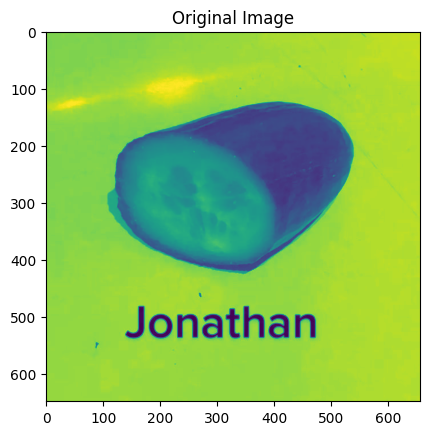

<Figure size 640x480 with 0 Axes>

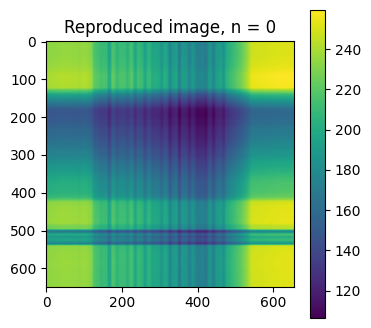

<Figure size 640x480 with 0 Axes>

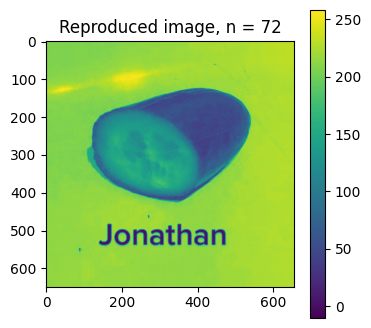

<Figure size 640x480 with 0 Axes>

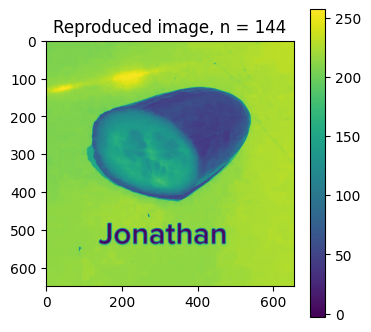

<Figure size 640x480 with 0 Axes>

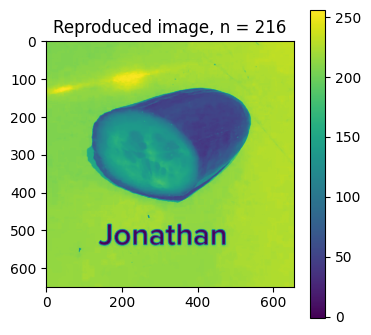

<Figure size 640x480 with 0 Axes>

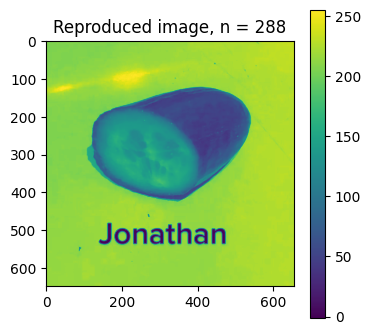

<Figure size 640x480 with 0 Axes>

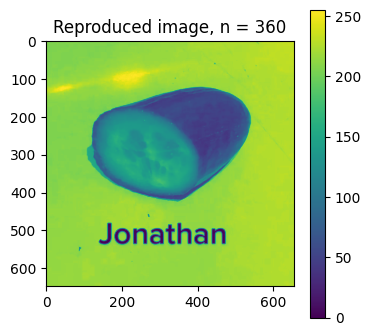

<Figure size 640x480 with 0 Axes>

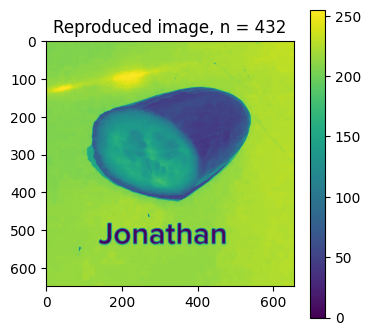

<Figure size 640x480 with 0 Axes>

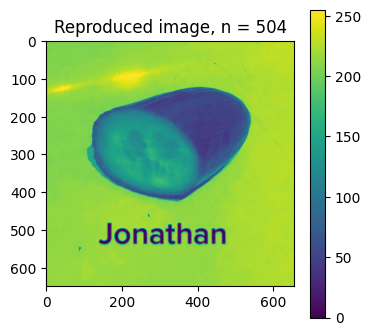

<Figure size 640x480 with 0 Axes>

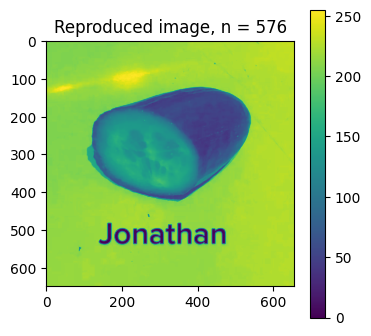

<Figure size 640x480 with 0 Axes>

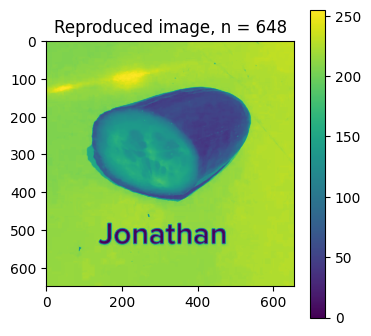

In [169]:
from PIL import Image
img = Image.open('jonathan.jpeg')
A = np.asarray(img)[:,:,0]   # the last index selects the RG or B component

plt.imshow(A)
plt.title('Original Image')
plt.show()

U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
n_arr = np.linspace(0,len(Sdiag)-1,10, dtype=int)


error = np.zeros(len(Sdiag))
for n in n_arr:
    A_trunc = np.zeros(A.shape)
    for i in range(n+1):
        u = U[:,i]
        u = np.expand_dims(u, axis=1)
        vT = VT[i, :]
        vT = np.expand_dims(vT, axis=0)
        A_trunc += Sdiag[i]*u@vT

        # plot_matrices([A_trunc, A], titles=['A truncated sum, n = {}'.format(n), 'A'])

    error_matrix = A_trunc - A
    # plt.scatter(n+1, np.abs(error[n]),c='k')
    plot_matrices([A_trunc], titles=[r"Reproduced image, n = {}".format(n)])
    error[n] = np.mean(A_trunc - A)

# plt.xlabel('Number of singular values', fontsize=18)
# plt.ylabel('Mean error', fontsize=18)
# plt.yscale('log')
# plt.show()

<Figure size 640x480 with 0 Axes>

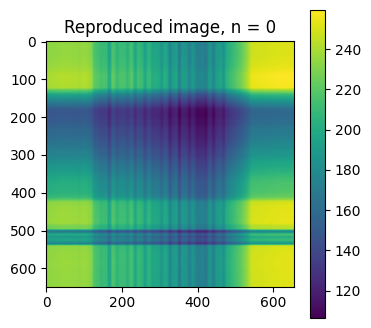

<Figure size 640x480 with 0 Axes>

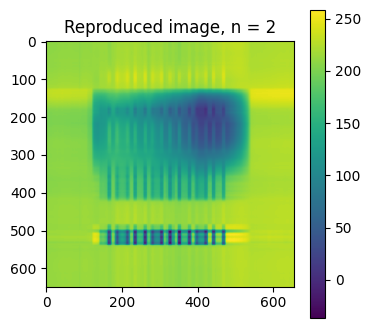

<Figure size 640x480 with 0 Axes>

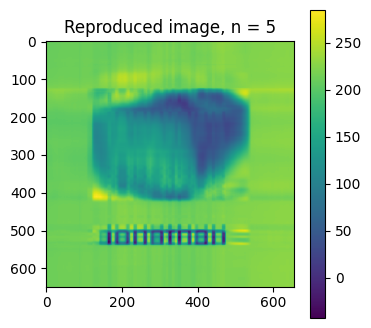

<Figure size 640x480 with 0 Axes>

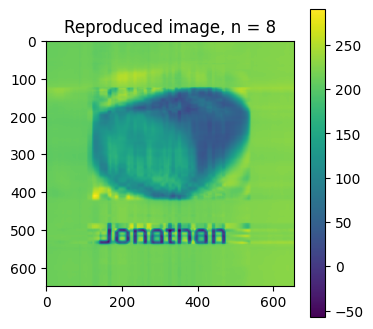

<Figure size 640x480 with 0 Axes>

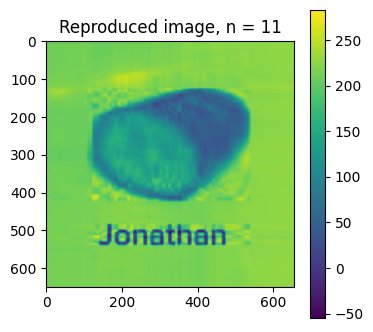

<Figure size 640x480 with 0 Axes>

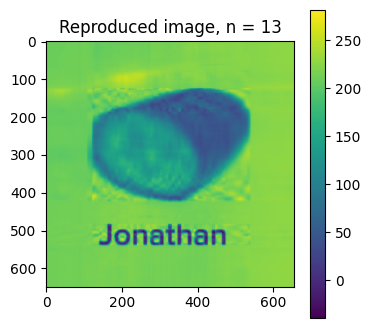

<Figure size 640x480 with 0 Axes>

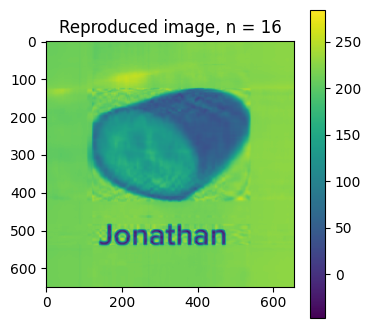

<Figure size 640x480 with 0 Axes>

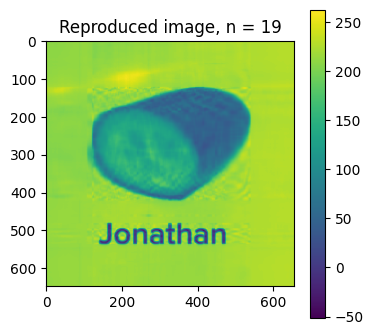

<Figure size 640x480 with 0 Axes>

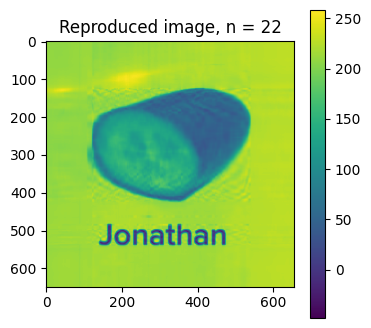

<Figure size 640x480 with 0 Axes>

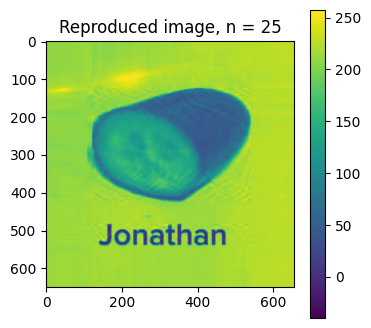

In [173]:
n_arr = np.linspace(0,25,10, dtype=int)

error = np.zeros(len(Sdiag))
for n in n_arr:
    A_trunc = np.zeros(A.shape)
    for i in range(n+1):
        u = U[:,i]
        u = np.expand_dims(u, axis=1)
        vT = VT[i, :]
        vT = np.expand_dims(vT, axis=0)
        A_trunc += Sdiag[i]*u@vT

        # plot_matrices([A_trunc, A], titles=['A truncated sum, n = {}'.format(n), 'A'])

    error_matrix = A_trunc - A
    # plt.scatter(n+1, np.abs(error[n]),c='k')
    plot_matrices([A_trunc], titles=[r"Reproduced image, n = {}".format(n)])
    error[n] = np.mean(A_trunc - A)

# Because my image is so simple, it gives a reasonable approximation by just using ~20 singular values! 

In [185]:
A_trunc = np.zeros(A.shape)
for i in range(20):
    u = U[:,i]
    u = np.expand_dims(u, axis=1)
    vT = VT[i, :]
    vT = np.expand_dims(vT, axis=0)
    A_trunc += Sdiag[i]*u@vT

im = Image.fromarray(A_trunc)
im = im.convert('RGB')
im.save("jonathan_compressed.jpeg")

import os

print(f'Original image size: {os.path.getsize("jonathan.jpeg")/1000} kb')
print(f'Compressed image size: {os.path.getsize("jonathan_compressed.jpeg")/1000} kb')
print(f'Compression factor: {round(os.path.getsize("jonathan.jpeg")/os.path.getsize("jonathan_compressed.jpeg"),2)}')



Original image size: 24.899 kb
Compressed image size: 21.877 kb
Compression factor: 1.14


# Fitting planetary orbits

# (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Radial velocity equation from class
# a is parameters array

def rv(t, P, a):
    mp, e, omega, tp, v0 = a
    M = 2*np.pi * (t-tp) / P
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))

    return vel

def Jacobian(t, P, a):
    A =  np.zeros([len(t), len(a)])
    eps = 1e-8
    a_next = a * (1+eps)
    a0 = a.copy()
    a1 = a.copy()
    a2 = a.copy()
    a3 = a.copy()
    a4 = a.copy()
    a0[0] = a_next[0]
    a1[1] = a_next[1]
    a2[2] = a_next[2]
    a3[3] = a_next[3]
    a4[4] = a_next[4]

    y = rv(t, P, a)
    y0 = rv(t, P, a0)
    y1 = rv(t, P, a1)
    y2 = rv(t, P, a2)
    y3 = rv(t, P, a3)
    y4 = rv(t, P, a4)

    # Calculate derivative
    A[:, 0] = (y0 - y) / (a_next[0]-a[0])
    A[:, 1] = (y1 - y) / (a_next[1]-a[1])
    A[:, 2] = (y2 - y) / (a_next[2]-a[2])
    A[:, 3] = (y3 - y) / (a_next[3]-a[3])
    A[:, 4] = (y4 - y) / (a_next[4]-a[4])

    return A


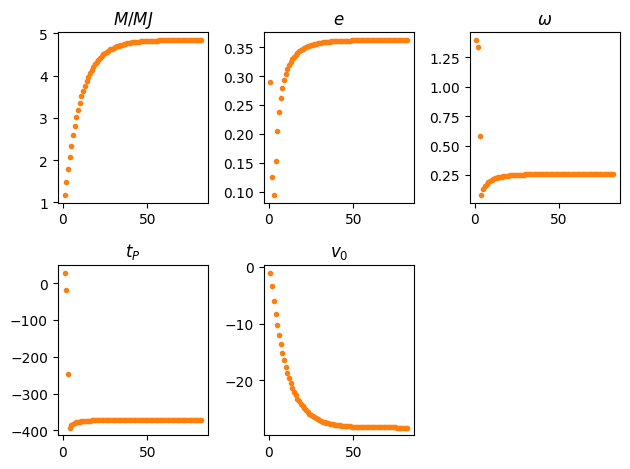

Best-fit parameters are: 
 [ 4.84288876e+00  3.62444179e-01  2.59047038e-01 -3.70742542e+02
 -2.82973240e+01]


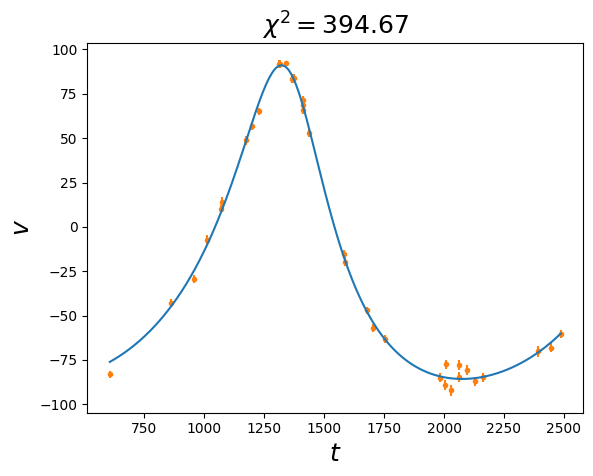

In [48]:
P = 1724
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)
# a = np.array((1, 0.5, 0.1, 0.1, 1)) 
a = np.array((1, 0.5, 1, 1, 1)) 
step = 0
chisq1 = 1.0
chisq = 1e99
lam = 1e-3
# keep going while chisq is dropping
while chisq > 1e-6:
    # compute the update to the parameters
    f = rv(tobs, P, a)
    A = Jacobian(tobs, P, a)
    r = vobs - f
    chisq = np.sum(r**2)
    lhs = A.T@A
    lhs = lhs@(np.identity(len(a))*(1+lam))
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    # calculate the chisq associated with the new parameters
    a1 = a + 0.1*da
    f1 = rv(tobs, P, a1)
    A1 = Jacobian(tobs, P, a1)
    r1 = vobs - f1
    chisq1 = np.sum(r1**2)
    # print("chisq = %lg, a=(%lg, %lg, %lg), lam = %lg" % (chisq1 ,a1[0], a1[1], a1[2], lam))
    # accept if chisq decreases; reject if it increases
    step += 1
    if chisq1 > chisq:
        lam = lam * 10
    else:
        lam = lam / 10
        a = a1
        # if the improvement in chisq becomes too small then exit
        if chisq-chisq1 < 1e-3:
            break
    titles = (r'$M/MJ$', r'$e$', r'$\omega$', r'$t_P$', r'$v_0$')
    for i, title in enumerate(titles):
        plt.subplot(2,3,i+1)
        plt.title(title)
        plt.plot(step, a[i],'C1.')

plt.tight_layout()
plt.show()

print("Best-fit parameters are: \n", a)

plt.plot(tobs, vobs, 'C1.')
plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.ylabel(r'$v$', fontsize=18)
plt.xlabel(r'$t$',fontsize= 18)

tt = np.linspace(tobs[0], tobs[-1], 1000)
vv = rv(tt, P, a)
plt.plot(tt,vv)
plt.title(f'$\chi ^2 = ${round(chisq,2)}', fontsize=18)

plt.show()

# The values from MCMC were [ 4.84630868e  0.364501212 0.255503798e -370.702893 -28.1650596]
# The best fit parameters for LM are  [ 4.84288876  0.362444179  0.259047038 -370.742542 -28.2973240]
# These values match each other nearly exactly, even though I used a slightly different starting guess for LM. For some instances of the LM I ran, my e was negative, which is non-physical, so I had to mess around with my starting values and alpha value. In those cases, the fit was still pretty good, so perhaps there are multiple possible combinations of parameters to fit this data properly, just not all are physically motivated.

# (b)

In [47]:
C_LM = np.linalg.inv(A.T@A)

In [50]:
# We adapt the MCMC planet code from class to generate the C matrix

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

seed = 239
rng = np.random.default_rng(seed)

def f(x, tobs, vobs, eobs):
    chisq = np.sum(((vobs-rv(tobs, P, x))/eobs)**2)
    return -chisq/2

# Observations
# These are for HD145675 from Butler et al. 2003
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)

# Number of samples to generate
N = 10**5
x = np.zeros((N, 5))

# initial guess
# P, mp, e, omega, tp, v0 
P = 1724
x[0] = [1.0, 0.0, 0.0, 0.0, 0.0]
# and the widths for the jumps
widths = (0.03, 0.03, 0.03, 3.0, 1.0)

count = 0

for i in range(N-1):
    
    # Proposal
    ii = np.random.randint(0, 5)
    x_try = np.copy(x[i])
    x_try[ii] += rng.normal(scale = widths[ii])

    #x_try[2] = (x_try[2]) % 1   # keep e between zero and 1
    
    # Accept the move or stay where we are
    u = rng.uniform()
    if u <= np.exp(f(x_try, tobs,vobs,eobs) - f(x[i], tobs,vobs,eobs)):
        x[i+1] = np.copy(x_try)
        count = count + 1
    else:
        x[i+1] = np.copy(x[i])

print("Acceptance fraction = %g" % (count/N,))

print(x[-1])

Acceptance fraction = 0.39874
[ 4.84630868e+00  3.64501212e-01  2.55503798e-01 -3.70702893e+02
 -2.81650596e+01]


In [46]:
C_MH = np.linalg.inv(x.T@x)

<Figure size 640x480 with 0 Axes>

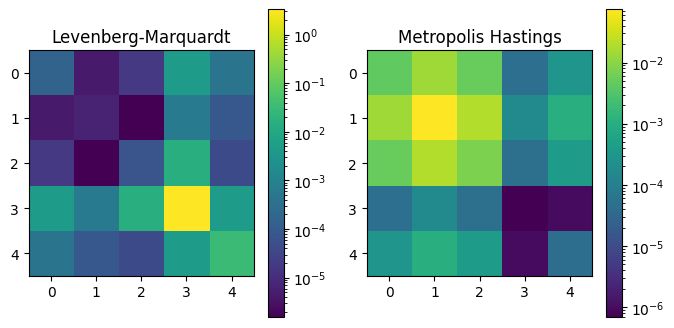

In [44]:
import matplotlib.colors

def plot_matrices_log(A,titles=[]):
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA, norm=matplotlib.colors.LogNorm())
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()

plot_matrices_log([np.abs(C_LM), np.abs(C_MH)],titles=["Levenberg-Marquardt", "Metropolis Hastings"])

# Order from left to right and top to bottom is mp, e, omega, tp, v0
# We take the absolute value first so that the relative variance between different parameters can be seen on a log scale. Using the LM method, its seems there is a strong covariance between tp and the other parameters, with it having the highest variance. So if I understand correctly it has the highest associated error. Not sure why this would be. For MCMC, the tp actually has the lowest variance and seems to have low covariance with the other parameters. Instead eccentricity is the variable it seems to have for the highest error. Perhaps there is a connection between tp and e, where one can change the other to retrieve the same fit. 

<Figure size 640x480 with 0 Axes>

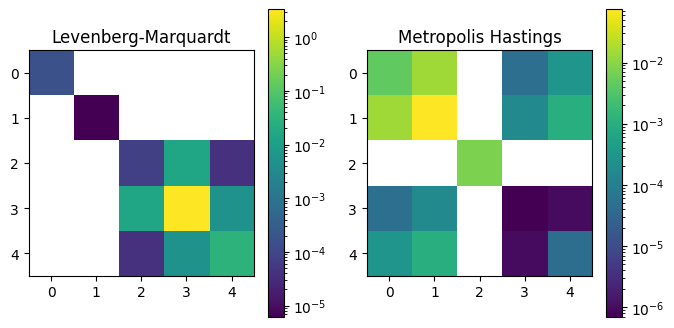

In [45]:
plot_matrices_log([C_LM, C_MH],titles=["Levenberg-Marquardt", "Metropolis Hastings"])

# Here we plot without taking the absolute value to see negative covariances. In MCMC, the omega value is negatively correlated with every other parameter. In LM, the mp and e eccentricity are also negatively correlated with all other parameters. Overall LM seems to favor anti correlated values, but when variables are correlated, the value is higher. MCMC has more positive correlations but they are smaller in value.